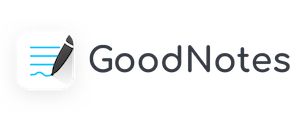

# Flight Delay Claims Analysis

### About
In the notebook below, you will find an analysis based on 
a dataset with flight delay claims from 2013/01 to 2016/07.

The main objective of this analysis is to identify the what attributes to
a low-risk or high-risk flight in order to improve <br>the company's pricing decisions

This notebook is divided in the following sections:<br>
1. Library Imports and file upload<br>
2. Logistic Regression<br>
3. Delay Analysis<br>
4. Final Conclusions & Recommendations

# 1. Library imports and file upload

In [6]:
import numpy as np
from scipy import stats
from scipy.integrate import quad
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
data = pd.read_csv('flight_delays_data.csv')

In [9]:
data

,flight_id,flight_no,Week,Departure,Arrival,Airline,std_hour,delay_time,flight_date
0,1582499,UO686,27,HKG,KIX,UO,10,0.4,7/1/16
1,1582501,CI7868,17,HKG,TNN,CI,11,0.5,4/23/15
2,1582504,PR301,14,HKG,MNL,PR,11,0,4/8/14
3,1582508,LD327,37,HKG,SIN,LD,3,0.1,9/15/13
4,1582509,KA5390,40,HKG,PEK,KA,9,0.5,10/5/15
...,...,...,...,...,...,...,...,...,...
899109,2793494,BA7408,22,HKG,BNE,BA,20,0.2,5/29/14
899110,2793495,CA6506,35,HKG,CKG,CA,13,1,8/30/15
899111,2793502,CX464,42,HKG,TPE,CX,19,0.6,10/20/15
899112,2793514,AA8902,1,HKG,SIN,AA,20,0.1,1/1/15


### Data Schema
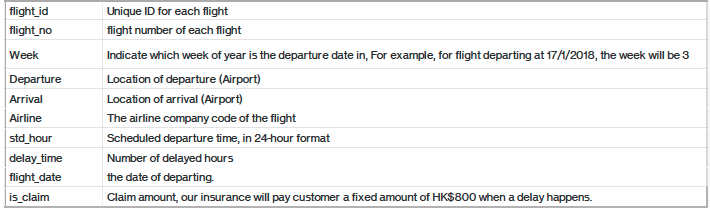


### Explore dimensions

In [10]:
a,b,c = data.Departure.unique() , data.Arrival.unique() , data.Airline.unique()
print('Departure:',a,'\n','Arrival:',b,'\n','Airline',c)

Departure: ['HKG'] 
 Arrival: ['KIX' 'TNN' 'MNL' 'SIN' 'PEK' 'IST' 'HGH' 'KUL' 'BLR' 'MXP' 'SYD' 'TPE'
 'MEL' 'SGN' 'NRT' 'CNX' 'AKL' 'BKK' 'HND' 'PVG' 'LHR' 'CTU' 'NGB' 'HAK'
 'SHA' 'ICN' 'NGO' 'DXB' 'LAX' 'HKT' 'HAN' 'KHN' 'CSX' 'DPS' 'NKG' 'CGK'
 'BKI' 'KHH' 'CEB' 'RMQ' 'JNB' 'BWN' 'OKA' 'PEN' 'USM' 'PUS' 'CCU' 'DEL'
 'WUH' 'FUK' 'MAA' 'CDG' 'CMB' 'JJN' 'TAO' 'CKG' 'MAN' 'CJU' 'RGN' 'BNE'
 'JFK' 'EWR' 'FRA' 'HEL' 'CNS' 'SFO' 'XMN' 'ILO' 'ORD' 'ZRH' 'YVR' 'ADL'
 'BOM' 'KWE' 'PER' 'MLE' 'GUM' 'TSN' 'VVO' 'DOH' 'AUH' 'KWL' 'AMS' 'TLV'
 'YNZ' 'WUX' 'CTS' 'DMK' 'KMG' 'KOJ' 'PNH' 'SYX' 'YYZ' 'YNT' 'CAN' 'BOS'
 'CRK' 'SUB' 'WNZ' 'FOC' 'DAC' 'CGO' 'ULN' 'AMM' 'REP' 'DFW' 'XIY' 'SVO'
 'HYD' 'ADD' 'DAD' 'TNA' 'SJW' 'KBV' 'NAN' 'NNG' 'DLC' 'KTM' 'MUC' 'ZHA'
 'FCO' 'RUH' 'MRU' 'YIW' 'HRB' 'SWA' 'SHE' 'DUS' 'POM' 'LJG' 'OKJ' 'HFE'
 'SEA' 'CXR' 'KLO' 'HIJ' 'SPN' 'LYA' 'MXZ' 'WUS' 'XNN' 'HET' 'XUZ' 'OVB'
 'ARN' 'CGQ' 'LHW' 'IKT' 'KMJ' 'KCH' 'ALA' 'BAH' 'KMI' 'MAD' 'NBO' 'ROR'
 'YTY' 'DTW' 'ZYI' 'O

### Exploring the 'Delay_Time' Column

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899114 entries, 0 to 899113
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight_id    899114 non-null  int64 
 1   flight_no    899114 non-null  object
 2   Week         899114 non-null  int64 
 3   Departure    899114 non-null  object
 4   Arrival      899114 non-null  object
 5   Airline      897400 non-null  object
 6   std_hour     899114 non-null  int64 
 7   delay_time   899114 non-null  object
 8   flight_date  899114 non-null  object
dtypes: int64(3), object(6)
memory usage: 61.7+ MB


In [12]:
#the daly column is an object because of the value 'Cancelled'.
data['delay_time'].unique()

array(['0.4', '0.5', '0', '0.1', '0.2', '0.3', '0.9', '0.8', '-0.1', '1',
       '0.7', '-0.2', '2.4', '0.6', '1.2', '1.4', '1.5', 'Cancelled',
       '-0.3', '2.3', '1.7', '3.7', '1.1', '3.8', '1.8', '5.4', '1.3',
       '-0.4', '2.2', '2.6', '16.2', '1.9', '1.6', '5.1', '4.8', '-0.7',
       '3.2', '2.1', '-9.3', '-8', '15.8', '2', '-7', '16', '3.9', '6.5',
       '3.5', '3', '-3.7', '5.3', '5', '2.7', '3.4', '5.7', '4', '-0.5',
       '2.8', '3.3', '-7.2', '-9.9', '3.6', '3.1', '7.5', '-8.2', '2.9',
       '2.5', '8.6', '6.8', '5.9', '4.7', '-13.9', '5.8', '12.8', '-8.1',
       '11', '-12.4', '10.6', '22.7', '18.3', '9.1', '-7.6', '7.8',
       '-6.6', '15.9', '16.1', '4.1', '12', '4.3', '4.4', '8.9', '6',
       '6.9', '7.9', '4.5', '-7.9', '17', '7.4', '7.1', '5.5', '6.4',
       '-7.7', '12.2', '-6.2', '11.9', '23.9', '4.9', '-10.8', '4.6',
       '9.8', '9.7', '16.8', '-1.6', '-12.7', '6.1', '8.7', '6.2', '12.6',
       '9.9', '17.6', '-7.8', '-7.3', '-7.5', '-1', '24', '4.2', 

In [13]:
#Remove records that are 'Cancelled' or have < 3 hours of delay.
ex_cancelled = data[~data.delay_time.isin(['Cancelled'])].copy()
ex_cancelled.delay_time = ex_cancelled.delay_time.astype('float64')
ex_cancelled = ex_cancelled[ex_cancelled.delay_time > 3]

<AxesSubplot:xlabel='delay_time'>

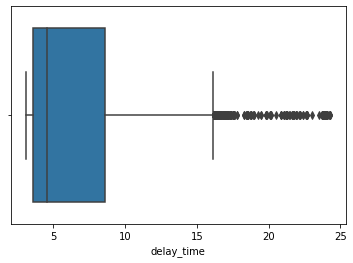

In [14]:
# Box plot
sns.boxplot(x = ex_cancelled.delay_time)


/Users/santiagocodaro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


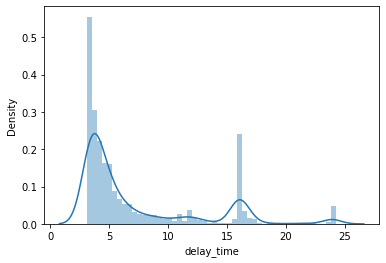

In [15]:
# Distribution plot
sns.distplot(ex_cancelled.delay_time)
plt.show()

In [16]:
#Save this value for section 2
ex_cancelled_median = ex_cancelled.delay_time.median()

### Summary
The 'delay_time' column is apparently the most important column since the claim of a flight depends directly<br>
of its values.<br><br>
After plotting the distribution of the 'delay_column' we see it is apparently right skewed with a lot of outliers.  <br><br>
In the last cell, the median of all claim flights was obtained. This will be used to replace 'Cancelled' <br>
values in section 2 (see 'process_inputs' function)

# 2. Logistic Regression

In this section, a Logistic Regression model will be trained to predict the flight claims.

### Helper Functions

In order to ease the readability of the notebook,
this section contains all the custom functions that are used in this section.


In [17]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df


In [18]:
def preprocess_inputs(df):
    df = df.copy()
    
     # Drop unneeded columns
    df = df.drop(['flight_id', 'flight_no', 'flight_date','std_hour'], axis=1)
    
    # One-hot encode nominal feature columns
    df = onehot_encode(
        df,
        column_dict={
            'Airline': 'AL', #e.g. AL_EasyJet
            'Departure': 'OA',
            'Arrival': 'DA'
        }
    )   
    
    #replace negative values with 0 and 'Cancelled' with the maximum delay.
    df['adj_delay'] = df['delay_time'].apply(lambda x: ex_cancelled_median if (x=='Cancelled') else x)
    df['adj_delay'] = df['adj_delay'].astype('float64')
    df['adj_delay'] = df['adj_delay'].apply(lambda x: 0 if (x < 0) else x)
    df = df.drop(['delay_time'], axis=1)
    
    #create column that states if there was a claim
    df['is_claim'] = df['adj_delay'].apply(lambda x: 1 if (float(x) > 3) else 0)
    
    # Split df into X and y
    y = df['is_claim'].copy()
    X = df.drop('is_claim', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.7, random_state=123)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


    return X_train, X_test, y_train, y_test

#----------------------------------------------------------------------------

def preprocess_inputs_without_delay(df):
    df = df.copy()
    
     # Drop unneeded columns
    df = df.drop(['flight_id', 'flight_no', 'flight_date','std_hour'], axis=1)
    
    # One-hot encode nominal feature columns
    df = onehot_encode(
        df,
        column_dict={
            'Airline': 'AL', #e.g. AL_EasyJet
            'Departure': 'OA',
            'Arrival': 'DA'
        }
    )   
    
    #replace negative values with 0 and 'Cancelled' with the maximum delay.
    df['adj_delay'] = df['delay_time'].apply(lambda x: ex_cancelled_median if (x=='Cancelled') else x)
    df['adj_delay'] = df['adj_delay'].astype('float64')
    df['adj_delay'] = df['adj_delay'].apply(lambda x: 0 if (x < 0) else x)
    df = df.drop(['delay_time'], axis=1)
    
    #create column that states if there was a claim
    df['is_claim'] = df['adj_delay'].apply(lambda x: 1 if (float(x) > 3) else 0)
    
    #Drop delay column
    df = df.drop(['adj_delay'], axis=1)
    
    # Split df into X and y
    y = df['is_claim'].copy()
    X = df.drop('is_claim', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.7, random_state=123)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


    return X_train, X_test, y_train, y_test

In [19]:
def evaluate_model(model, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Test Accuracy: {:.2f}%".format(model_acc * 100))
    
    y_true = np.array(y_test)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=["NOT CANCELLED", "CANCELLED"])
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2) + 0.5, ["NOT CANCELLED", "CANCELLED"])
    plt.yticks(np.arange(2) + 0.5, ["NOT CANCELLED", "CANCELLED"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

### Pre-Processing

In [20]:

X_train, X_test, y_train, y_test = preprocess_inputs(data)


In [21]:
#now columns are scaled.
X_train


,Week,AL_2P,AL_3K,AL_3U,AL_3V,AL_5J,AL_7C,AL_9C,AL_9W,AL_AA,AL_AB,AL_AC,AL_AE,AL_AF,AL_AI,AL_AK,AL_AY,AL_B5,AL_B6,AL_BA,AL_BG,AL_BI,AL_BL,AL_BO,AL_BR,AL_BX,AL_CA,AL_CI,AL_CX,AL_CZ,AL_DG,AL_DL,AL_E8,AL_ED,AL_EK,AL_ET,AL_EY,AL_FD,AL_FJ,AL_FM,AL_GA,AL_GK,AL_HB,AL_HG,AL_HM,AL_HO,AL_HU,AL_HX,AL_HZ,AL_JD,AL_JL,AL_JT,AL_JU,AL_JW,AL_KA,AL_KC,AL_KE,AL_KL,AL_KQ,AL_LA,AL_LD,AL_LH,AL_LJ,AL_LV,AL_LX,AL_LY,AL_MD,AL_MF,AL_MH,AL_MJ,AL_MK,AL_MM,AL_MU,AL_NH,AL_NQ,AL_NZ,AL_O3,AL_O8,AL_OD,AL_OM,AL_OX,AL_OZ,AL_P7,AL_PG,AL_PK,AL_PQ,AL_PR,AL_PX,AL_QF,AL_QG,AL_QR,AL_RA,AL_RI,AL_RJ,AL_S7,AL_SA,AL_SK,AL_SO,AL_SQ,AL_SU,AL_SV,AL_TG,AL_TK,AL_TP,AL_TR,AL_TT,AL_TV,AL_TZ,AL_UA,AL_UB,AL_UL,AL_UO,AL_US,AL_VA,AL_VN,AL_VQ,AL_VS,AL_WY,AL_XF,AL_Y8,AL_Z2,AL_ZE,AL_ZH,OA_HKG,DA_ADD,DA_ADL,DA_AKL,DA_ALA,DA_AMM,DA_AMS,DA_ARN,DA_AUH,DA_BAH,DA_BKI,DA_BKK,DA_BLR,DA_BNE,DA_BOM,DA_BOS,DA_BWN,DA_CAN,DA_CCU,DA_CDG,DA_CEB,DA_CGK,DA_CGO,DA_CGQ,DA_CJU,DA_CKG,DA_CMB,DA_CNS,DA_CNX,DA_CRK,DA_CSX,DA_CTS,DA_CTU,DA_CXR,DA_DAC,DA_DAD,DA_DEL,DA_DFW,DA_DLC,DA_DMK,DA_DOH,DA_DPS,DA_DTW,DA_DUS,DA_DXB,DA_EWR,DA_FCO,DA_FOC,DA_FRA,DA_FUK,DA_GUM,DA_HAK,DA_HAN,DA_HEL,DA_HET,DA_HFE,DA_HGH,DA_HIJ,DA_HKT,DA_HND,DA_HRB,DA_HYD,DA_ICN,DA_IKT,DA_ILO,DA_IST,DA_JFK,DA_JHG,DA_JJN,DA_JNB,DA_KBV,DA_KCH,DA_KHH,DA_KHN,DA_KIX,DA_KLO,DA_KMG,DA_KMI,DA_KMJ,DA_KOJ,DA_KTM,DA_KUL,DA_KWE,DA_KWL,DA_LAX,DA_LGA,DA_LHR,DA_LHW,DA_LJG,DA_LYA,DA_MAA,DA_MAD,DA_MAN,DA_MEL,DA_MLE,DA_MNL,DA_MRU,DA_MUC,DA_MXP,DA_MXZ,DA_NAN,DA_NBO,DA_NGB,DA_NGO,DA_NKG,DA_NNG,DA_NRT,DA_OKA,DA_OKJ,DA_OOL,DA_ORD,DA_OVB,DA_PEK,DA_PEN,DA_PER,DA_PNH,DA_POM,DA_PUS,DA_PVG,DA_REP,DA_RGN,DA_RMQ,DA_ROR,DA_RUH,DA_SEA,DA_SFO,DA_SGN,DA_SHA,DA_SHE,DA_SIN,DA_SJW,DA_SPN,DA_SUB,DA_SVO,DA_SWA,DA_SYD,DA_SYX,DA_TAK,DA_TAO,DA_TLV,DA_TNA,DA_TNN,DA_TPE,DA_TSN,DA_ULN,DA_USM,DA_VVO,DA_WNZ,DA_WUH,DA_WUS,DA_WUX,DA_XIY,DA_XMN,DA_XNN,DA_XUZ,DA_YIW,DA_YNT,DA_YNZ,DA_YTY,DA_YVR,DA_YYZ,DA_ZHA,DA_ZRH,DA_ZYI,adj_delay
0,-0.067703,-0.008169,-0.052165,-0.033177,-0.005637,-0.090839,-0.045019,-0.054838,-0.086452,-0.191851,-0.021396,-0.107347,-0.076396,-0.054677,-0.073742,-0.084718,-0.153466,-0.001261,-0.038531,-0.148635,-0.009764,-0.036904,-0.017829,-0.002183,-0.118676,-0.03424,-0.171075,-0.140126,-0.559374,-0.080856,-0.031019,-0.059778,-0.028728,-0.005912,-0.068178,-0.05928,-0.115961,-0.076027,-0.023622,-0.127006,-0.069771,-0.029949,-0.002183,-0.021692,-0.072013,-0.038942,-0.104362,-0.266436,-0.006045,-0.001261,-0.18869,-0.003986,-0.013981,-0.036926,2.685165,-0.019078,-0.07607,-0.046208,-0.022413,-0.07801,-0.024869,-0.057736,-0.035248,-0.019409,-0.033819,-0.03424,-0.024676,-0.057402,-0.123684,-0.020172,-0.033177,-0.051688,-0.157645,-0.10315,-0.001783,-0.109804,-0.004882,-0.037546,-0.014318,-0.025218,-0.040329,-0.091927,0.0,-0.103887,-0.005197,-0.009764,-0.085655,-0.019854,-0.07015,-0.001783,-0.121736,-0.021471,-0.021097,-0.026086,-0.092932,-0.090919,-0.015896,-0.001261,-0.098765,-0.050894,-0.003986,-0.100602,-0.05366,-0.056518,-0.059858,-0.002819,-0.001783,-0.031402,-0.108665,-0.012351,-0.04323,-0.15018,-0.043414,-0.092697,-0.077254,-0.001261,-0.037968,-0.03183,-0.005912,-0.001261,-0.020793,-0.031979,-0.049591,0.0,-0.045513,-0.053853,-0.122607,-0.020524,-0.011553,-0.052501,-0.015896,-0.064741,-0.011959,-0.088152,-0.242108,-0.04725,-0.080307,-0.091583,-0.024611,-0.046945,-0.063125,-0.042523,-0.073042,-0.070503,-0.117514,-0.053241,-0.017514,-0.035496,-0.093305,-0.03424,-0.050532,-0.069391,-0.055533,-0.04146,-0.053226,-0.125237,-0.010163,-0.044931,-0.051129,-0.111284,-0.056206,-0.043156,-0.073949,-0.070161,-0.103902,-0.001783,-0.015946,-0.084318,-0.052333,-0.030397,-0.089343,-0.067635,-0.057791,-0.025375,-0.065443,-0.091194,-0.035942,-0.011959,-0.018657,-0.141399,-0.018995,-0.098945,-0.124219,-0.012025,-0.025933,-0.195121,-0.011062,-0.020329,-0.045019,-0.094193,-0.001783,-0.070446,-0.085824,-0.01945,-0.008824,-0.148009,-0.02029,-0.154768,-0.01682,-0.06043,-0.013752,-0.007872,-0.020093,-0.028197,-0.179666,-0.028783,-0.045178,-0.105823,0.0,-0.096493,-0.009002,-0.010163,-0.011275,-0.054487,

In [22]:
X_train.mean() #they are all close to 0

Week        -1.997654e-16
AL_2P        1.396340e-15
AL_3K       -5.977035e-16
AL_3U       -1.136787e-14
AL_3V       -8.447072e-15
                 ...     
DA_YYZ       2.332764e-14
DA_ZHA      -4.097669e-15
DA_ZRH       3.625250e-15
DA_ZYI      -2.941056e-16
adj_delay    6.349439e-17
Length: 288, dtype: float64

In [23]:
X_train.var() #all close to 1

Week         1.000002
AL_2P        1.000002
AL_3K        1.000002
AL_3U        1.000002
AL_3V        1.000002
               ...   
DA_YYZ       1.000002
DA_ZHA       1.000002
DA_ZRH       1.000002
DA_ZYI       1.000002
adj_delay    1.000002
Length: 288, dtype: float64

In [24]:
#Non Cancelled vs Cancelled
y_train.value_counts()

0    601868
1     27511
Name: is_claim, dtype: int64

### Training

In [25]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Results

Test Accuracy: 99.99%


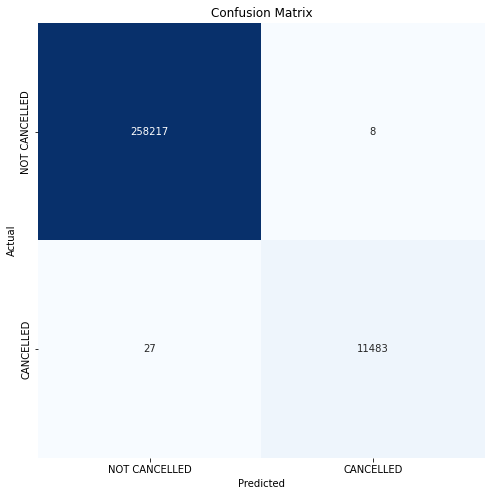

Classification Report:
----------------------
                precision    recall  f1-score   support

NOT CANCELLED       1.00      1.00      1.00    258225
    CANCELLED       1.00      1.00      1.00     11510

     accuracy                           1.00    269735
    macro avg       1.00      1.00      1.00    269735
 weighted avg       1.00      1.00      1.00    269735



In [26]:
evaluate_model(model, X_test, y_test)

👆 The model is clearly over fitting and it is probably because of the 'adj_delay' column. <br>
In the next cells, the same model will be tried but excluding the mentioned column.

### Pre-Processing  WITH OUT 'adj_delay'

In [27]:
X_train, X_test, y_train, y_test = preprocess_inputs_without_delay(data)

### Training

In [28]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Results

Test Accuracy: 95.74%


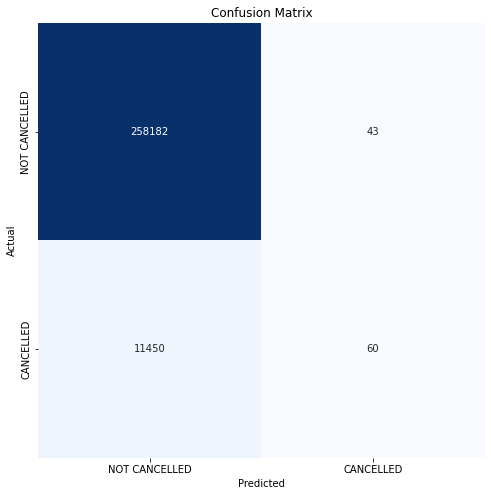

Classification Report:
----------------------
                precision    recall  f1-score   support

NOT CANCELLED       0.96      1.00      0.98    258225
    CANCELLED       0.58      0.01      0.01     11510

     accuracy                           0.96    269735
    macro avg       0.77      0.50      0.49    269735
 weighted avg       0.94      0.96      0.94    269735



In [29]:
evaluate_model(model, X_test, y_test)

👆This time the model couldn't predict almost none of the actually cancelled flights.

### Conclusion

With the Logistic Regression Model we have found that the most and only variable that predicts cancelled flights <br>
is 'adj_delay'. <br>

In the future, the historical delay data of airline routes could be used to set a price accordingly. <br><br>

In the next (and last) section a deep analysis of the flights delays is going to be performed.

# 3. Delay Analysis

### helper functions

In [30]:
# A custom function to calculate probability distribution function
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

In [31]:
def format_df(df):
    df = df.copy()
    
     # Drop unneeded columns
    df = df.drop(['flight_id', 'flight_no', 'flight_date','std_hour'], axis=1)
       
    
    #replace negative values with 0 and 'Cancelled' with the maximum delay.
    df['adj_delay'] = df['delay_time'].apply(lambda x: '25' if (x=='Cancelled') else x)
    df['adj_delay'] = df['adj_delay'].astype('float64')
    df['adj_delay'] = df['adj_delay'].apply(lambda x: 0 if (x < 0) else x)
    df = df.drop(['delay_time'], axis=1)
    
    #create column that states if there was a claim
    df['is_claim'] = df['adj_delay'].apply(lambda x: 1 if (float(x) > 3) else 0)
    
    #Aeroline_Departure_Arrival column
    df['air_route'] = df['Airline']+"_"+ df['Departure']+'_'+df['Arrival']
    df['route'] = df['Departure']+'_'+df['Arrival']


    return df


In [32]:
#Label flights in relation to their accumulated coefficient percentage.
def label_df(df_ar):
    
    if (df_ar['cumm_asc_pct_coeff'] >= 0.75):
        return 'Higher Risk: Most Expensive'
    elif (df_ar['cumm_asc_pct_coeff'] >= 0.5):
        return 'High Risk: High Price'
    elif (df_ar['cumm_asc_pct_coeff'] >= 0.25):
        return 'Moderated Risk: Mid Price'
    elif (df_ar['cumm_asc_pct_coeff'] >= 0):
        return 'Low Risk: Low Price'
    else:
        None

### Group data by Aeroline_Departure_Arrival column

In [33]:
df = format_df(data) #refer to 'Helper Functions' section

In [34]:
#pivot
df_ar = pd.pivot_table(df,index= ['air_route'], values= ['is_claim','route'],
                       aggfunc={'is_claim': np.sum,'route': 'count'}) 
                       #margins=True) #.div(len(df['Sender'].index)).mul(100).round(2).astype(str).applymap(lambda x: str(x)+"%")
df_ar.rename(columns = {'route':'flights'}, inplace = True)
df_ar

,is_claim,flights
air_route,,
2P_HKG_CEB,15,61
3K_HKG_SIN,88,2498
3U_HKG_CTU,29,799
3U_HKG_ZHA,6,166
3V_HKG_DXB,0,26
...,...,...
ZH_HKG_FOC,0,1
ZH_HKG_JJN,221,1802
ZH_HKG_SHE,8,21


In [35]:
# REMOVE OUTLIERS

#Create column to show the % of claims respect to the total flights 
df_ar['pct_claims'] = (df_ar['is_claim'] / df_ar['flights']).round(4)


#Create risk coefficient that weights both % of claims and claims occurrences.
#Higher values will represent aeriline routes with the higher % and amount of flights.
df_ar['coeff'] = (df_ar['pct_claims']*100) * df_ar['is_claim']
df_ar.sort_values('coeff',ascending=False, inplace=True)
df_ar.reset_index(inplace=True)

# Remove outliers and start again in the next cell
df_ar = df_ar[(np.abs(stats.zscore(df_ar['coeff'])) < 3)]
df_ar.reset_index(inplace=True)
df_ar = df_ar.drop(['index','pct_claims','coeff'], axis=1)

In [36]:
#CREATE COLUMNS AGAIN

#Create column to show the % of claims respect to the total flights 
df_ar['pct_claims'] = (df_ar['is_claim'] / df_ar['flights']).round(4)


#Create risk coefficient that weights both % of claims and claims occurrences.
#Higher values will represent aeriline routes with the higher % and amount of flights.
df_ar['coeff'] = (df_ar['pct_claims']*100) * df_ar['is_claim']
df_ar.sort_values('coeff',ascending=False, inplace=True)
df_ar.reset_index(inplace=True)

In [37]:
#normalized coefficient column from 0 to 1.
df_ar['norm_coeff'] = (df_ar['coeff']-df_ar['coeff'].min())/(df_ar['coeff'].max()-df_ar['coeff'].min())

# airline route contribution in % of the total coefficient.
total = df_ar['coeff'].sum()
df_ar['pct_coeff'] = df_ar['coeff']/total

# cummulative descending columns as 'sum' and % 
df_ar['cumm_desc_sum_coeff'] = None
df_ar.loc[0,'cumm_desc_sum_coeff']=df_ar['coeff'][0]
for i in range(1,df_ar['coeff'].count()):
    df_ar.loc[i,'cumm_desc_sum_coeff']= ((df_ar['cumm_desc_sum_coeff'][i-1] +\
                                          df_ar['coeff'][i]))
df_ar['cumm_desc_pct_coeff'] = (df_ar['cumm_desc_sum_coeff'] / total)

#cummulative ascending columns as 'sum' and %
df_ar.sort_values('coeff',ascending=True, inplace=True)
df_ar.reset_index(inplace=True)
df_ar = df_ar.drop(['index'], axis=1)
df_ar['cumm_asc_sum_coeff'] = None
df_ar.loc[0,'cumm_asc_sum_coeff']=df_ar['coeff'][0]
for i in range(1,df_ar['coeff'].count()):
    df_ar.loc[i,'cumm_asc_sum_coeff']= ((df_ar['cumm_asc_sum_coeff'][i-1] \
                                          + df_ar['coeff'][i]))
df_ar['cumm_asc_pct_coeff'] = (df_ar['cumm_asc_sum_coeff'] / total)

#rearange df
df_ar.sort_values('coeff',ascending=False, inplace=True)
df_ar.reset_index(inplace=True)
df_ar = df_ar.drop(['index','level_0'], axis=1)
df_ar

,air_route,is_claim,flights,pct_claims,coeff,norm_coeff,pct_coeff,cumm_desc_sum_coeff,cumm_desc_pct_coeff,cumm_asc_sum_coeff,cumm_asc_pct_coeff
0,MU_HKG_TNA,168,448,0.3750,6300.00,1.000000,0.023246,6300.0,0.023246,271011.89,1.0
1,HX_HKG_BKK,573,6141,0.0933,5346.09,0.848586,0.019726,11646.09,0.042973,264711.89,0.976754
2,BG_HKG_DAC,68,91,0.7473,5081.64,0.806610,0.018751,16727.73,0.061723,259365.8,0.957027
3,CX_HKG_BKK,654,8460,0.0773,5055.42,0.802448,0.018654,21783.15,0.080377,254284.16,0.938277
4,CZ_HKG_SWA,205,836,0.2452,5026.60,0.797873,0.018548,26809.75,0.098925,249228.74,0.919623
...,...,...,...,...,...,...,...,...,...,...,...
713,JL_HKG_FUK,0,9,0.0000,0.00,0.000000,0.000000,271011.89,1.0,0.0,0.0
714,XF_HKG_VVO,0,28,0.0000,0.00,0.000000,0.000000,271011.89,1.0,0.0,0.0
715,Y8_HKG_HGH,0,1,0.0000,0.00,0.000000,0.000000,271011.89,1.0,0.0,0.0
716,LD_HKG_BKK,0,27,0.0000,0.00,0.000000,0.000000,271011.89,1.0,0.0,0.0


### Visualize top 10% riskier airline routes to check for Pareto's rule

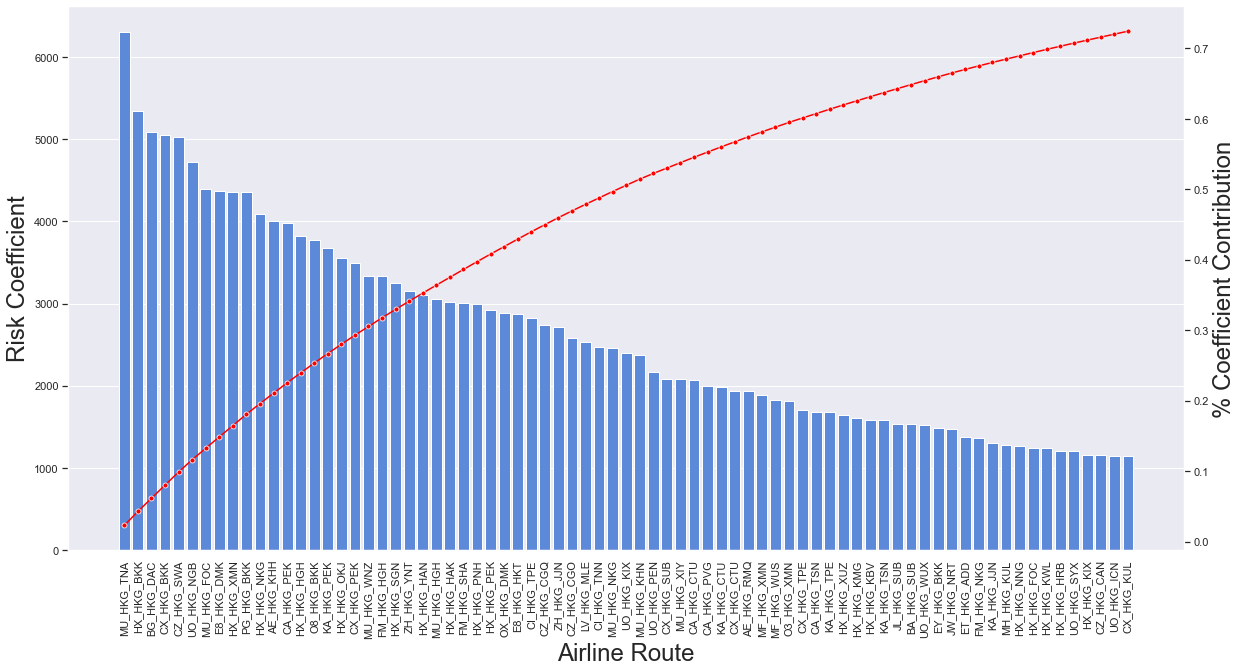

In [38]:
sns.set(font_scale = 20)

sns.set(rc = {'figure.figsize':(20,10)})

p = sns.barplot(x = 'air_route',
            y = 'coeff',
            ci=None, 
            estimator=sum,
            #order = desc_sort_sum_count_message,
            #palette='crest_r',
            color = '#4885ed',
            data = df_ar[:75])
plt.xticks(rotation=90)
p.set_ylabel('Risk Coefficient',fontsize=24)
p.set_xlabel('Airline Route',fontsize=24)

#graph the line chart
ax2 = plt.twinx()
ax2.grid(False)
ax2.set_ylabel('% Coefficient Contribution',fontsize=24)

sns.lineplot(x = 'air_route',
             y = 'cumm_desc_pct_coeff',
             ax=ax2,
            ci=None, 
            estimator=sum,
            #palette='crest_r',
            color = 'red',
             marker="o", ms=5,
            data = df_ar[:75])
 
# Show the plot
plt.show()


👆 The first 75 (~10% of all 733) airline routes account for the 70% accumulated risk coefficient. <br><br>

💡 This means that the remaining 643 (~90%) airline routes are way less adverse to claims.

In [39]:
#descriptive statistics
df_ar_stats = df_ar['coeff'].describe().to_dict()
df_ar_stats

{'count': 718.0,
 'mean': 377.45388579387196,
 'std': 883.4995882587392,
 'min': 0.0,
 '25%': 5.5675,
 '50%': 36.56,
 '75%': 223.97,
 'max': 6300.0}

# Label flights

In [40]:
df_ar['label'] = df_ar.apply(label_df, axis = 1)                             

In [41]:
df_labels=df_ar.groupby(['label'],sort = False)['coeff'].describe().round(2)
df_labels

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Higher Risk: Most Expensive,15.0,4578.87,685.84,3768.36,4046.75,4375.00,5041.01,6300.00
High Risk: High Price,23.0,2971.28,361.79,2393.16,2722.08,2992.89,3197.39,3678.45
Moderated Risk: Mid Price,44.0,1511.58,376.35,964.22,1189.63,1503.28,1819.38,2376.99
Low Risk: Low Price,636.0,106.10,182.58,0.00,3.71,27.02,100.01,958.86


In [42]:
#df_ar.coeff.quantile(0.75)
df_ar.coeff.describe()

count     718.000000
mean      377.453886
std       883.499588
min         0.000000
25%         5.567500
50%        36.560000
75%       223.970000
max      6300.000000
Name: coeff, dtype: float64

/Users/santiagocodaro/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='label', ylabel='coeff'>

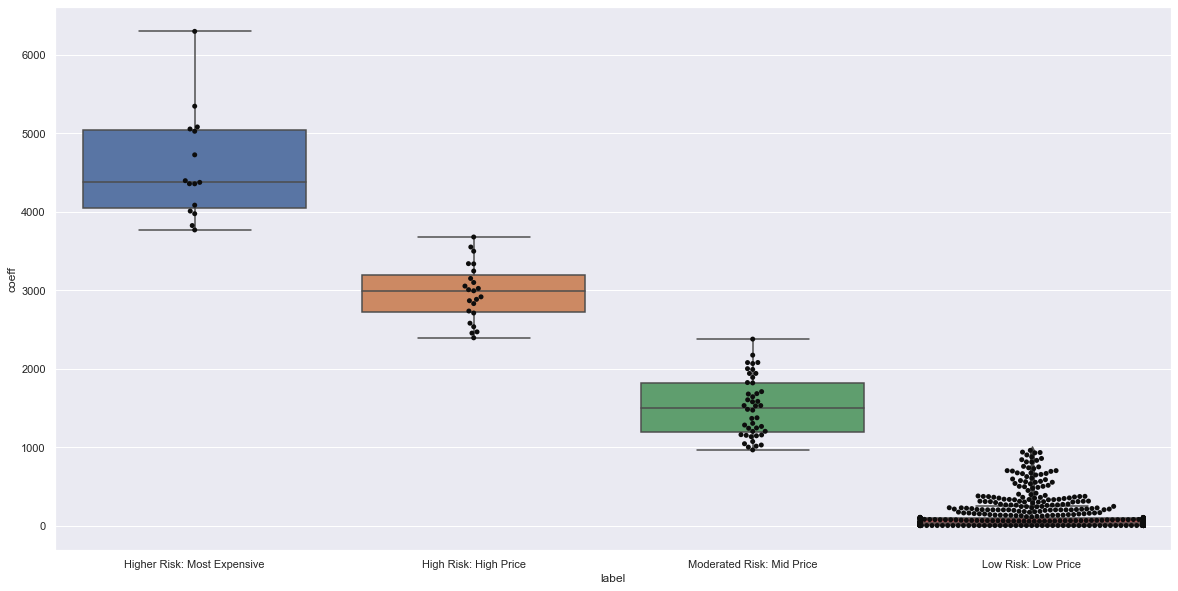

In [43]:
sns.boxplot(y =df_ar['coeff'], x=df_ar['label'])

sns.swarmplot(y =df_ar['coeff'], x=df_ar['label'], color=".05")

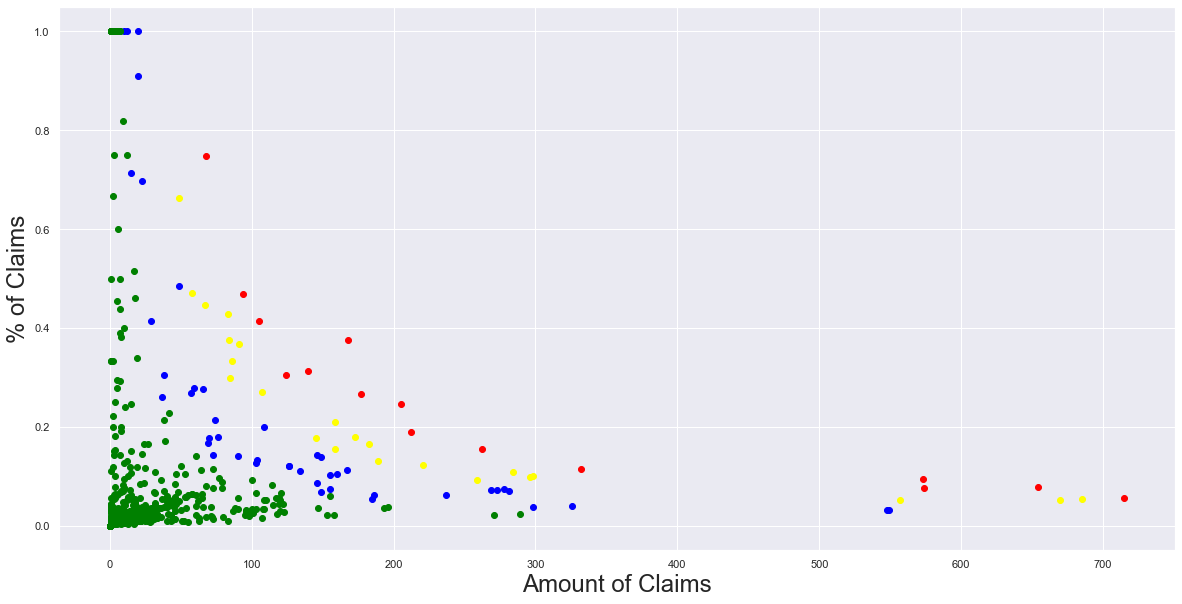

In [44]:
# set x and y
x1 = df_ar[df_ar.label.isin(['Higher Risk: Most Expensive'])]['is_claim'].tolist().copy()
y1 = df_ar[df_ar.label.isin(['Higher Risk: Most Expensive'])]['pct_claims'].tolist().copy()

x2 = df_ar[df_ar.label.isin(['High Risk: High Price'])]['is_claim'].tolist().copy()
y2 = df_ar[df_ar.label.isin(['High Risk: High Price'])]['pct_claims'].tolist().copy()

x3 = df_ar[df_ar.label.isin(['Moderated Risk: Mid Price'])]['is_claim'].tolist().copy()
y3 = df_ar[df_ar.label.isin(['Moderated Risk: Mid Price'])]['pct_claims'].tolist().copy()

x4 = df_ar[df_ar.label.isin(['Low Risk: Low Price'])]['is_claim'].tolist().copy()
y4 = df_ar[df_ar.label.isin(['Low Risk: Low Price'])]['pct_claims'].tolist().copy()

# set scatter
plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='yellow')
plt.scatter(x3, y3, color='blue')
plt.scatter(x4, y4, color='green')

# plot setting
plt.xlabel('Amount of Claims', fontsize = 24)
plt.ylabel('% of Claims', fontsize = 24)

#plt.show()

#plt.tight_layout()
plt.savefig('flight scatter.png')

# 4. Final Conclusions & Recommendations

📈 During the analysis, a very strong correlation between the delay of a flight and its claim request was found
while the correlation among other variables was not significative. <br>
<br>
🛩 Based on this finding, a risk coefficient was created, and then, each airline route was labeled according to
its % contribution to the mentioned coefficient.<br>
<br>
💵 It is recommended to set prices according to the labels, and for future unlabeled airline routes, use the claim risk coefficient moving averages of the last 8 weeks to determine its price rank.